<a href="https://colab.research.google.com/github/ronit2603/ML-Projects/blob/master/Copy_of_Low_Code_%26_Auto_ML_with_PyCaret_Advanced_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Low-Code & Auto-ML with PyCaret - Advanced

Welcome to this hands-on workshop session where we will learn about leveraging the very popular low-code and auto-ml library PyCaret!

![](https://i.imgur.com/cWzC62x.png)


The focus of this notebook is to continue from where we left off in the kickstarter notebook and dive into more complex features in PyCaret! 

# 1 - Objective


The objective of this notebook will be to tackle the same classification problem from the Kickstarter notebook using the power of PyCaret. We will be exploring more advanced features and capabilities of PyCaret along the way:

-  __Getting Data:__ Learn how to import default datasets from PyCaret repository

-  __Custom Environment Setup:__ Learn how to setup a custom experiment in PyCaret with advanced data transformations!

-  __Compare Models:__ Learn how to compare multiple machine learning models for the given classification task based on model evaluation metrics

-  __Create Model:__ Learn how to create specific classifical models, perform stratified cross validation and evaluate classification metrics

-  __Tune Model:__ Learn how to automatically tune the hyper-parameters of classification models in different ways

-  __Ensemble Model:__ Learn how to automatically ensemble classification models in different ways

-  __Plot Model:__ Learn how to analyze model performance using various diagnostic plots

-  __Interpret Model:__ Learn how to interpret and explain classification models in different ways using XAI

-  __Finalize Model:__ Learn how to finalize the best model at the end of the experiment

-  __Predict Model:__ Learn how to make predictions on new / unseen data 



# 2 - Install PyCaret

The first step to get started is to install `pycaret`. 

Run all the cells below to install necessary dependencies for some of the advanced capabilities to use with PyCaret along with PyCaret itself



In [ ]:
!pip install explainerdashboard
!pip install optuna
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 305 kB 7.7 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 569 kB 58.2 MB/s 
     |████████████████████████████████| 197 kB 68.7 MB/s 
     |████████████████████████████████| 57 kB 6.5 MB/s 
     |████████████████████████████████| 46 kB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 36.9 MB/s 
     |████████████████████████████████| 470 kB 48.3 MB/s 
     |████████████████████████████████| 64 kB 2.9 MB/s 
     |████████████████████████████████| 357 kB 50.3 MB/s 
     |████████████████████████████████| 136 kB 71.1 MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=a94d93da77513bb864a5bdd4965ce1c22174ab4b69b259414e8f8bffe1777f48
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
  Created w

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 8.5 MB/s 
     |████████████████████████████████| 6.8 MB 31.3 MB/s 
     |████████████████████████████████| 88 kB 6.3 MB/s 
     |████████████████████████████████| 167 kB 58.9 MB/s 
     |████████████████████████████████| 1.3 MB 68.6 MB/s 
     |████████████████████████████████| 262 kB 70.1 MB/s 
     |████████████████████████████████| 17.9 MB 449 kB/s 
     |████████████████████████████████| 10.4 MB 18.7 MB/s 
     |████████████████████████████████| 125 kB 22.9 MB/s 
     |████████████████████████████████| 56 kB 2.5 MB/s 
     |████████████████████████████████| 1.7 MB 43.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 42.9 MB/s 
     |████████████████████████████████| 

In [ ]:
pip install -U jinja2 # https://github.com/pycaret/pycaret/issues/2591 to bypass import errors later on

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 7.6 MB/s 
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


## Restart the Kernel now and then proceed by running the following cells as usual

## 2.1 - Enable Interactive Visuals

If you are using Google Colab, please run the following to enable interactive visuals

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# 3 - Binary Classification

The objective in this notebook will be to solve a predictive machine learning classification problem. To be more specific, it is going to be binary classification.

Binary classification is a supervised machine learning technique where the key objective is to predict a response variable given a set of independent variables (features). The response variable is categorical, having two discrete class labels, such as 1/0, Yes/No, Positive/Negative, Default/Not-Default and so on. 

A few real world use cases for classification are listed below:

- Fraud detection models to detect if a transaction is fraudulent or not fraudulent
- A "pass or fail" test method or quality control in factories, i.e. deciding if a specification has or has not been met – a go/no-go classification.
- Sentiment Analysis -> Positive or Negative

# 4 - PyCaret Classification Module

PyCaret's `classification` module (`pycaret.classification`) is a supervised machine learning module which is used for training, tuning, evaluating and deploying classification models. 

The PyCaret `classification` module can be used for Binary or Multi-class classification problems. It has over 18 algorithms and 14 plots to analyze the performance of models. Be it hyper-parameter tuning, ensembling or advanced techniques like stacking, PyCaret's classification module has it all.

Do check out [`pycaret.classification`'s documentation](https://pycaret.gitbook.io/docs/get-started/quickstart#classification)and [full-fledged APIs](https://pycaret.readthedocs.io/en/latest/api/classification.html) as needed!

# 5 - Getting the Data

We will be using a popular open-source dataset, called the "Adult" dataset also known as "Census Income" dataset.

Key Objective: Predict whether income exceeds $50K/yr based on census data

You can download the data from the original source [found here](https://archive.ics.uci.edu/ml/datasets/adult) 


and load it using `pandas` or you can use PyCaret's data respository to load the data using the `get_data()` function (This will require an internet connection).

The PyCaret version of the dataset is slightly more processed and is a subset.

## 5.1 - Data Retrieval

In [ ]:
from pycaret.datasets import get_data
dataset = get_data('income')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  income >50K     32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [ ]:
dataset.shape

(32561, 14)

## 5.2 - Split Data into Train-Test Datasets

In order to demonstrate the `predict_model()` function on unseen data, a holdout sample of 15% records has been withheld from the original dataset to be used for predictions. 

This will be your true unseen test dataset to be used at the end once all training is complete as a simulation of live real data.

In [ ]:
# create train - test datasets
data_train = dataset.sample(frac=0.85, random_state=42)
data_test = dataset.drop(data_train.index)

# reset row numbers \ indices
data_train.reset_index(inplace=True, drop=True)
data_test.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data_train.shape))
print('Unseen Data For Predictions: ' + str(data_test.shape))

Data for Modeling: (27677, 14)
Unseen Data For Predictions: (4884, 14)


## 5.3 - Understanding the Data

Let's try to understand our dataset now in terms of the given attributes.

We use a dataset modified dataset from UCI called [Adult Data Set
](https://archive.ics.uci.edu/ml/datasets/adult). 

This dataset contains census data and details about various aspects of people and their income.

There are 32561 samples and 14 features. 

Brief descriptions of each column are as follows:

- __age__: continuous; age of the person

- __workclass__: categorical; working class of the person;
Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- __education__: categorical; educational qualification of the person;
Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- __education-num__: discrete numeric; educational qualification of the person as a encoded value; 

- __marital-status__: categorical; marital status of the person; 
Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

- __occupation__: categorical; occupation of the person;
Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- __relationship__: categorical; relationship information;
Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- __race__: categorical; race information;
White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- __sex__: categorical; gender of the person; 
Female, Male.

- __capital-gain__: continuous; overall capital gain 

- __capital-loss__: continuous; overall capital loss

- __hours-per-week__: continuous; working hours per week

- __native-country__: categorical; native country of residence;
United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- **`income >50K`**: Whether the income of the person is more than $50K (1=yes, 0=no) Target Column

The original dataset and data dictionary can be [found here](https://archive.ics.uci.edu/ml/datasets/adult).

In [ ]:
data_train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,27,Private,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,0
1,45,State-gov,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
2,29,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,1
3,30,Private,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,0
4,29,Self-emp-not-inc,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,2202,0,50,United-States,0


# 6 - PyCaret Environment Setup

The `setup()` function initializes the environment in `pycaret` and creates the transformation pipeline to prepare the data for modeling and deployment. 



In [ ]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
experiment = setup(data=data_train, target='income >50K', session_id=42) 

,Description,Value
0,session_id,42
1,Target,income >50K
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(27677, 14)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. 

Most of the information is related to the pre-processing pipeline which is constructed when `setup()` is executed. 

We are not doing any extensive pre-processing to start with, however a few important things to note at this stage include:

- **session_id :**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the `session_id` is set as `123` for later reproducibility.

- **Target Type :**  Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

- **Label Encoded :**  When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this experiment no label encoding is required since the target variable is of type numeric.

- **Original Data :**  Displays the original shape of the dataset. In this experiment (27677, 14) means 27,677 samples and 14 features including the target column. 

- **Missing Values :**  When there are missing values in the original data this will show as True. For this experiment there are several missing values in the dataset. 

- **Numeric Features :**  The number of features inferred as numeric. In this dataset, 4 features are inferred as numeric. 

- **Categorical Features :**  The number of features inferred as categorical. In this dataset, 9 features are inferred as categorical.

- **Transformed Train Set :**  Displays the shape of the transformed training set. Notice that the original shape of (27677, 24) is transformed into (19373, 104) for the transformed train set and the number of features have increased to 104 due to categorical encoding 

- **Transformed Test Set :**  Displays the shape of the transformed test/hold-out set. There are 8304 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the `train_size` parameter in setup. Can also be used as a validation set if you make decisions of choosing the best model based on this subset.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. 

Most of the parameters in `setup()` are optional and used for customizing the pre-processing pipeline.



# 7 - Comparing all Models

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). 

This function trains all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC accross the folds (10 by default) along with training times.

We use a 3-fold cross validation and focus on the F1-score metric

In [ ]:
best_model = compare_models(fold=3, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8690,0.9222,0.6434,0.7728,0.7022,0.6191,0.6234,0.4600
ada,Ada Boost Classifier,0.8578,0.9083,0.6062,0.7531,0.6716,0.5822,0.5878,0.8900
gbc,Gradient Boosting Classifier,0.8634,0.9159,0.5767,0.7979,0.6695,0.5862,0.5984,2.4733
nb,Naive Bayes,0.7969,0.8915,0.8137,0.5522,0.6579,0.5209,0.5407,0.1133
rf,Random Forest Classifier,0.8464,0.8870,0.6092,0.7097,0.6556,0.5574,0.5602,2.2033
lr,Logistic Regression,0.8484,0.9029,0.5840,0.7302,0.6489,0.5538,0.5594,3.9900
knn,K Neighbors Classifier,0.8394,0.8647,0.6062,0.6877,0.6443,0.5412,0.5430,6.7533
et,Extra Trees Classifier,0.8272,0.8453,0.5907,0.6552,0.6213,0.5097,0.5109,2.4600
lda,Linear Discriminant Analysis,0.8375,0.8892,0.5528,0.7063,0.6201,0.5187,0.5251,0.3867
dt,Decision Tree Classifier,0.8179,0.7595,0.6137,0.6223,0.6179,0.4984,0.4984,0.2000


Looks like boosting models have taken up the leaderboard above!

What we will do next is focus on the top model and apply different data transformation techniques to see if it improves 
in terms of performance

# 8 - Profiling your Dataset

We can use `pandas_profiling` to generate a nice data profile report of our dataset to get an idea of the major issues in our data which we can perhaps fix in the next section

In [ ]:
import pandas_profiling

ImportError: ignored

In [ ]:
report = pandas_profiling.ProfileReport(data_train)
report

NameError: ignored

# 9 - Advanced Data Transformations

In this section we will setup another classification experiment but we will make some additional transformations to the dataset:

- **imputation_type :**  We do not use the default imputation methodology anymore in PyCaret which does mean imputation for numeric and constant imputation for categorical. Here we use iterative ML based imputation using a lightGBM model

- **remove_multicollinearity :**  We set this to true to remove features which might be highly correlated

- **multicollinearity_threshold :**  We set this to 0.9 to remove features which might be having more than 0.9 correlation with other features

- **fix_imbalance :**  We set this to True because we have imbalanced classes and hence this will internally use the SMOTE oversampling technique to generate synthetic data to create more samples for the minority class

In [ ]:
experiment2 = setup(data=data_train, 
                    target='income >50K', 
                    session_id=42,
                    imputation_type='iterative',
                    remove_multicollinearity=True,
                    multicollinearity_threshold=0.9,
                    fix_imbalance=True
                   ) 

,Description,Value
0,session_id,42
1,Target,income >50K
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(27677, 14)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
data_train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,27,Private,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,0
1,45,State-gov,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
2,29,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,1
3,30,Private,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,0
4,29,Self-emp-not-inc,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,2202,0,50,United-States,0


In [ ]:
X_train = get_config('X_train')
X_train.head()

,age,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
8918,58.0,0.0,0.0,50.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15925,61.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8478,46.0,0.0,0.0,45.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23234,53.0,15024.0,0.0,60.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18553,21.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Here we build the top 5 models from the last time with our new data transformations

In [ ]:
best_model = compare_models(fold=5, sort='F1', 
                            include=['lightgbm', 'ada',	'gbc', 'nb',	'rf'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8632,0.9221,0.7045,0.7195,0.7118,0.6221,0.6222,2.166
gbc,Gradient Boosting Classifier,0.8450,0.9111,0.7432,0.6564,0.6971,0.5935,0.5956,6.066
ada,Ada Boost Classifier,0.8361,0.9061,0.7453,0.6352,0.6858,0.5759,0.5794,2.152
rf,Random Forest Classifier,0.8400,0.8823,0.6176,0.6849,0.6494,0.5461,0.5474,4.328
nb,Naive Bayes,0.7486,0.8835,0.8617,0.4866,0.6219,0.4547,0.4964,0.748


# 10 - Create ML Models

`create_model` is one of the most important functions in PyCaret and is often the starting point or foundation behind most of the PyCaret functionalities. 

As the name suggests this function trains and evaluates a model using cross validation that can be set with `fold` parameter. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa and MCC by fold. 

For the remaining part of this tutorial, we will work with the following model which is our top performing model

The selection is based on the best model with the top F1-score:

```
- Light Gradient Boosting Machine ('lightgbm')
```

There are 18 classifiers available in the model library of PyCaret. To see list of all classifiers either check the `docstring` or use `models` function to see the library.

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## 10.1 - Create Light Gradient Boosting Model

In [ ]:
lgbm = create_model('lightgbm', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8670,0.9219,0.7135,0.7272,0.7203,0.6330,0.6331
1,0.8631,0.9206,0.6929,0.7247,0.7084,0.6191,0.6193
2,0.8653,0.9212,0.6934,0.7311,0.7117,0.6239,0.6243
Mean,0.8651,0.9212,0.6999,0.7277,0.7135,0.6253,0.6256
Std,0.0016,0.0005,0.0096,0.0026,0.0050,0.0058,0.0057


In [ ]:
lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# 11 - Tune ML Models

When a model is created using the `create_model()` function it uses the default hyperparameters to train the model. 

In order to tune hyperparameters, the [`tune_model()`](https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.tune_model) function is used. 

This function automatically tunes the hyperparameters of a model using `Randomized Search` on a pre-defined search space. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC by fold for the best model. 

To use the custom search grid, you can pass `custom_grid` parameter in the `tune_model` function (see 9.2 Logistic Regression tuning below).

## 11.1 Tune Light Gradient Boosting Model with Randomized Search

Uses Randomized Search method to tune the model on F1-score

In [ ]:
tuned_lgbm_f1 = tune_model(lgbm, fold=3, n_iter=5, optimize='F1', choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8616,0.9190,0.6748,0.7284,0.7006,0.6107,0.6115
1,0.8572,0.9163,0.6671,0.7181,0.6916,0.5989,0.5996
2,0.8671,0.9199,0.6972,0.7352,0.7157,0.6291,0.6295
Mean,0.8620,0.9184,0.6797,0.7272,0.7026,0.6129,0.6135
Std,0.0040,0.0015,0.0128,0.0070,0.0099,0.0124,0.0123


## 11.2 Tune Light Gradient Boosting Model with Bayesian Search

Uses Bayesian Search method to tune the model on F1-score using Optuna

The Tree-structured Parzen Estimator (TPE) is a sequential model-based optimization (SMBO) approach. SMBO methods sequentially construct models to approximate the performance of hyperparameters based on historical measurements, and then subsequently choose new hyperparameters to test based on this model.

In [ ]:
tuned_lgbm_f1_opt = tune_model(lgbm, fold=3, n_iter=5, optimize='F1', 
                               search_library='optuna', search_algorithm='tpe', 
                               choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8596,0.9210,0.6761,0.7213,0.6980,0.6066,0.6071
1,0.8603,0.9181,0.6665,0.7285,0.6961,0.6057,0.6067
2,0.8674,0.9200,0.6830,0.7435,0.7120,0.6261,0.6270
Mean,0.8624,0.9197,0.6752,0.7311,0.7020,0.6128,0.6136
Std,0.0035,0.0012,0.0068,0.0093,0.0071,0.0094,0.0095


Looks like tuning didn't yield any significant improvements. That could also be because the number of trials we tried our were very less.

# 12 - Ensembling ML Models

This functionality helps in ensembling a given model in different ways

## 12.1 - Create a simple decision tree model

In [ ]:
dt = create_model('dt', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8020,0.7434,0.6006,0.5852,0.5928,0.4620,0.4621
1,0.8052,0.7381,0.5742,0.5981,0.5859,0.4586,0.4588
2,0.8128,0.7509,0.5888,0.6146,0.6014,0.4791,0.4793
Mean,0.8066,0.7441,0.5879,0.5993,0.5934,0.4666,0.4667
Std,0.0045,0.0052,0.0108,0.0120,0.0063,0.0090,0.0090


## 12.2 - Ensemble model by Bagging

Trains multiple models independently in parallel and combines their predictions to build one big model

In [ ]:
bagged_dt = ensemble_model(estimator=dt, fold=3, optimize='F1', n_estimators=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8354,0.8597,0.6032,0.6761,0.6376,0.5315,0.5330
1,0.8281,0.8557,0.5884,0.6590,0.6217,0.5109,0.5123
2,0.8391,0.8647,0.6030,0.6878,0.6426,0.5393,0.5413
Mean,0.8342,0.8600,0.5982,0.6743,0.6339,0.5273,0.5289
Std,0.0046,0.0037,0.0069,0.0118,0.0089,0.0120,0.0122


In [ ]:
bagged_dt

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

## 12.3 - Ensemble model by Boosting

Trains multiple models sequentially where one model tries to learn from the mistakes of the previous model, and combines their predictions to build one big model

In [ ]:
boosted_dt = ensemble_model(estimator=dt, fold=3, optimize='F1', n_estimators=10, method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8277,0.8477,0.6174,0.6479,0.6323,0.5198,0.5201
1,0.8323,0.8612,0.6090,0.6643,0.6355,0.5268,0.5277
2,0.8233,0.8660,0.6449,0.6283,0.6365,0.5198,0.5199
Mean,0.8277,0.8583,0.6238,0.6469,0.6348,0.5222,0.5226
Std,0.0037,0.0077,0.0153,0.0147,0.0018,0.0033,0.0036


In [ ]:
boosted_dt

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

## 12.4 - Ensemble model by Blending

This function trains a Soft Voting / Hard Voting Majority Rule classifier for select models passed in the `estimator_list` parameter.

In [ ]:
# train individual models to blend
lightgbm = create_model('lightgbm', fold=3, verbose=False)
gbc = create_model('gbc', fold=3, verbose=False)
rf = create_model('rf', fold=3, verbose=False)

In [ ]:
# blend individual models based on soft labels i.e predicted probabilities
blend_soft = blend_models(estimator_list=[lightgbm, gbc, rf], method='soft', optimize='F1', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8630,0.9169,0.7013,0.7203,0.7107,0.6209,0.6210
1,0.8585,0.9149,0.6742,0.7187,0.6957,0.6037,0.6042
2,0.8660,0.9160,0.7017,0.7295,0.7154,0.6278,0.6280
Mean,0.8625,0.9159,0.6924,0.7229,0.7073,0.6175,0.6177
Std,0.0031,0.0008,0.0129,0.0048,0.0084,0.0102,0.0100


In [ ]:
# blend individual models based on hard labels i.e predicted labels
blend_hard = blend_models(estimator_list=[lightgbm, gbc, rf], method='hard', optimize='F1', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8609,0.0,0.7155,0.7082,0.7118,0.6202,0.6202
1,0.8552,0.0,0.6903,0.7016,0.6959,0.6009,0.6010
2,0.8620,0.0,0.7088,0.7139,0.7114,0.6207,0.6207
Mean,0.8594,0.0,0.7049,0.7079,0.7064,0.6139,0.6140
Std,0.0030,0.0,0.0106,0.0050,0.0074,0.0092,0.0092


## 12.5 - Ensemble model by Stacking

This function trains a meta-model over select estimators passed in the `estimator_list` parameter. Which means predictions of the initial models go as inputs into the meta model which makes the final predictions

In [ ]:
dt_meta = create_model('dt', fold=3, verbose=False)
stack_soft1 = stack_models(estimator_list=[lightgbm, gbc, rf], 
                           meta_model=dt_meta, optimize='F1', 
                           meta_model_fold=3, fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8151,0.7093,0.4974,0.6501,0.5636,0.4489,0.4554
1,0.8191,0.7168,0.5071,0.6605,0.5737,0.4614,0.4679
2,0.8154,0.7111,0.5016,0.6491,0.5659,0.4511,0.4572
Mean,0.8165,0.7124,0.5020,0.6532,0.5677,0.4538,0.4602
Std,0.0018,0.0032,0.0040,0.0052,0.0043,0.0055,0.0055


# 13 - Plot ML Model Evaluation Diagnostics

Before model finalization, the `plot_model()` function can be used to analyze and evaluate the model performance across different aspects such as AUC, confusion_matrix, decision boundary etc. 

This function takes a trained model object and returns a plot based on the test / hold-out set. 

There are many different plots available, please see the `plot_model()` docstring for the list of available plots.

## 13.1 - Confusion Matrix

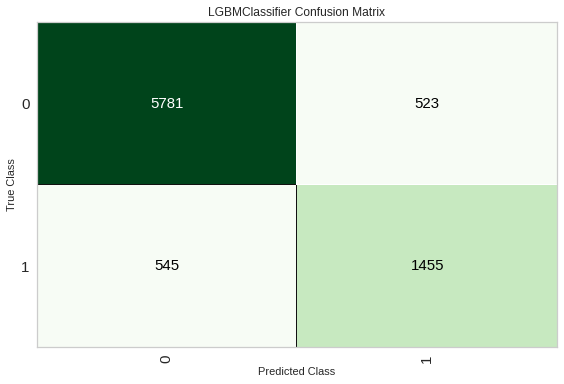

In [ ]:
plot_model(lgbm, plot='confusion_matrix')

## 13.2 - Feature Importance

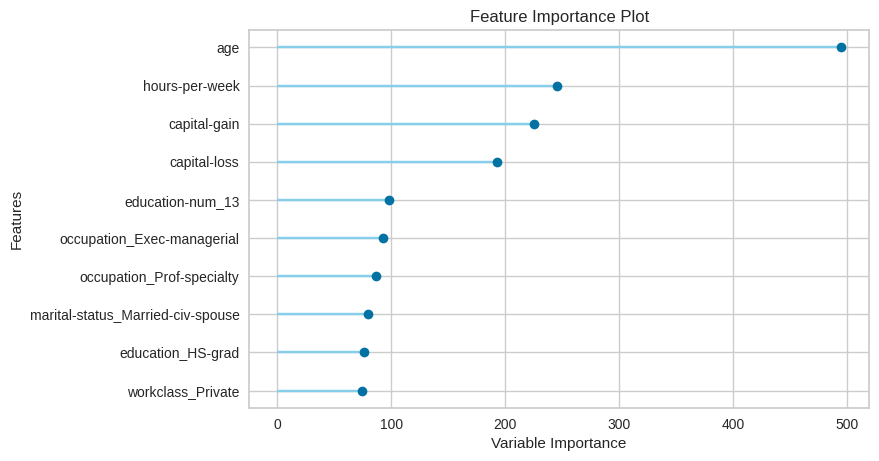

In [ ]:
plot_model(lgbm, plot='feature')

## 13.3 - ROC AUC Curve

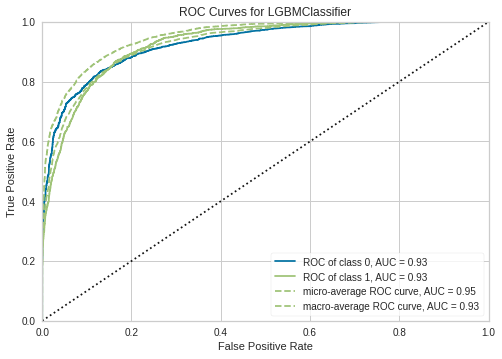

In [ ]:
plot_model(lgbm, plot='auc')

## 13.4 - Classification Report

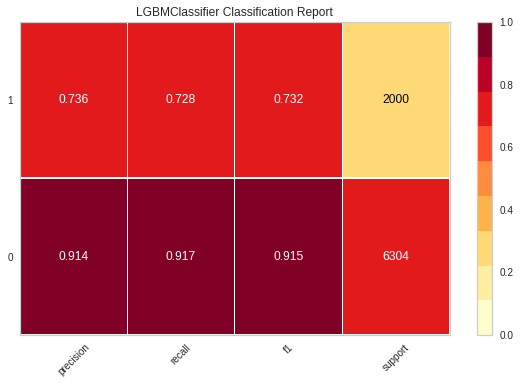

In [ ]:
plot_model(lgbm, plot='class_report')

*Another* way to analyze the performance of models is to use the `evaluate_model()` function which displays a user interface for all of the available plots for a given model. It internally uses the `plot_model()` function. 

In [ ]:
evaluate_model(lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 14 - Interpret your ML Models with XAI

## 14.1 - SHAP Summary Plot

Shows effects of each feature on model predictions based on SHAP values for the entire test dataset. 

Positive values have a positive influence on model (pushes it to predict the positive class) and negative values have a negative influence on the model (pushes it to predict the negative class)

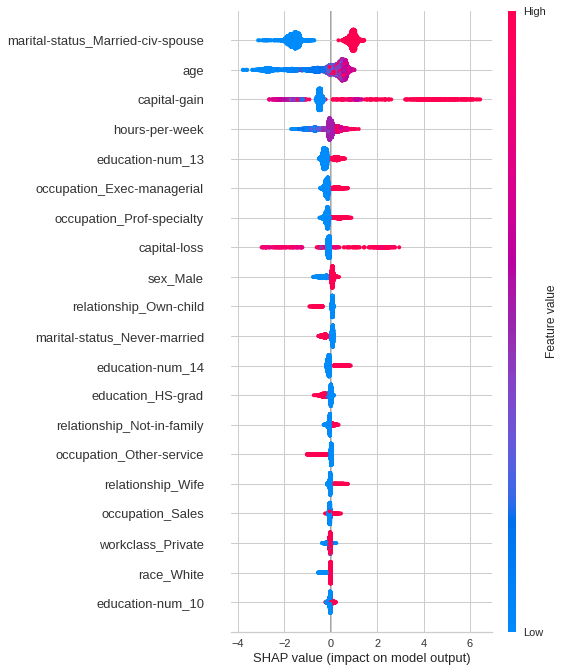

In [ ]:
interpret_model(lgbm, plot='summary')

## 14.2 - SHAP Partial Dependence Plots

Shows effects of specific features on model predictions based on SHAP values for the entire test dataset. 

Positive values have a positive influence on model (pushes it to predict the positive class) and negative values have a negative influence on the model (pushes it to predict the negative class)

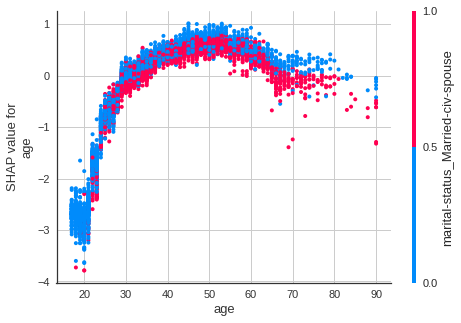

In [ ]:
interpret_model(lgbm, plot='correlation', feature='age')

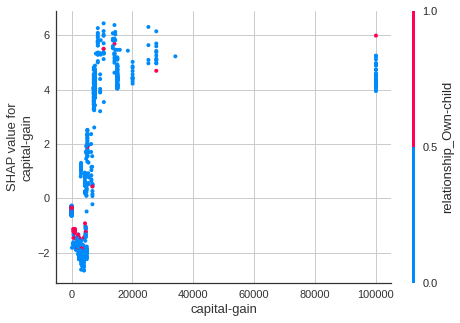

In [ ]:
interpret_model(lgbm, plot='correlation', feature='capital-gain')

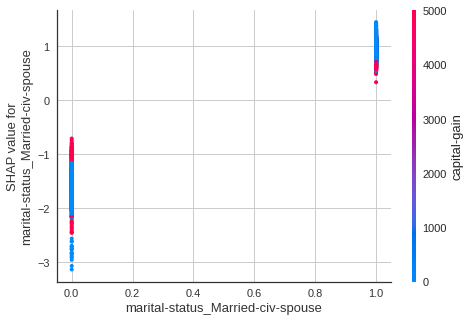

In [ ]:
interpret_model(lgbm, plot='correlation', feature='marital-status_Married-civ-spouse')

## 14.3 - SHAP Reasoning Plot

Shows effects of specific features on model predictions based on SHAP values for a specific row of the test dataset.

Positive values have a positive influence on model (pushes it to predict the positive class) and negative values have a negative influence on the model (pushes it to predict the negative class)

In [ ]:
predict_model(lgbm, data=data_test.iloc[0:1], verbose=False)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K,Label,Score
0,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1,1,0.9488


In [ ]:
interpret_model(lgbm, plot='reason', X_new_sample=data_test.iloc[0:1])

In [ ]:
predict_model(lgbm, data=data_test.iloc[5:6], verbose=False)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K,Label,Score
5,31,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,43,United-States,0,0,0.9111


In [ ]:
interpret_model(lgbm, plot='reason', X_new_sample=data_test.iloc[5:6])

## 14.4 - XAI Explainer Dashboard

This generates an interactive dashboard for a trained model consisting of evaluation metrics and SHAP based explanation artifacts

In [ ]:
pip install explainerdashboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 6.7 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 3.1.2
    Uninstalling Jinja2-3.1.2:
      Successfully uninstalled Jinja2-3.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
dashboard(lightgbm)

NameError: ignored

## We need to open a tunnel since we can't open a webpage inside colab

In [ ]:
from pyngrok import ngrok
from getpass import getpass

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
print('https://dashboard.ngrok.com/auth')
NGROK_AUTH_TOKEN = getpass('Enter the ngrok authtoken: ')
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 8050 for http://localhost:8050
ngrok_tunnel = ngrok.connect(addr="8050", proto="http", bind_tls=True)
print("Explainer Dashboard UI:", ngrok_tunnel.public_url)

# 15 - Finalize Model for Deployment

Model finalization is the last step in the experiment. 

A normal machine learning workflow in PyCaret starts with `setup()`, followed by comparing all models using `compare_models()` and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. (more on advanced techniques in the next tutorial!).

This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. 


The `finalize_model()` function fits the model onto the complete dataset **including** the test/hold-out sample (30% in this case). The purpose of this function is to **train the model on the complete dataset** before it is deployed in production.

In [ ]:
final_lgbm = finalize_model(lgbm)

In [ ]:
#Final Light Gradient Boosting Model to be used for deployment
final_lgbm

# 16 - Predict on unseen / new datasets

The `predict_model()` function is also used to predict on any new / unseen datasets. 

The only difference from section 11 above is that this time we will pass the `data_test` parameter. `data_test` is the variable created at the beginning of the tutorial and contains 15% of the original dataset which was never exposed to PyCaret. (see section 5 for explanation)

In [ ]:
new_predictions = predict_model(final_lgbm, data=data_test)

In [ ]:
new_predictions.head()

The `Label` and `Score` columns are added onto the `data_test` set. 

Label is the prediction and score is the probability of the prediction. 

Notice that predicted results are concatenated to the original dataset while all the data transformations are automatically performed in the background. 


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(new_predictions['income >50K'], new_predictions['Label']))